# Fase 1: Exploración y Limpieza

## Exploración Inicial:

In [132]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro,  poisson, chisquare, expon, kstest

In [2]:
df1 = pd.read_csv('Customer Flight Activity.csv')
pd.set_option('display.max_columns', None)

In [3]:
df2 = pd.read_csv('Customer Loyalty History.csv')
pd.set_option('display.max_columns', None)

In [4]:
df1.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df2.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
print(df1.shape)
print(df2.shape)

(405624, 10)
(16737, 16)


In [7]:
df1.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [8]:
df2.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [9]:
columnas1 = df1.columns
for columna in columnas1:
    print(f'Analizamos la columna {columna}')
    print(df1[columna].unique())
    print(df1[columna].value_counts())
    print('-----------------------------------------')

Analizamos la columna Loyalty Number
[100018 100102 100140 ... 999731 999788 999891]
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64
-----------------------------------------
Analizamos la columna Year
[2017 2018]
2017    202812
2018    202812
Name: Year, dtype: int64
-----------------------------------------
Analizamos la columna Month
[ 1  9  2  3 11  4  5  7  6  8 10 12]
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: Month, dtype: int64
-----------------------------------------
Analizamos la columna Flights Booked
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13   

In [10]:
columnas2 = df2.columns
for columna in columnas2:
    print(f'Analizamos la columna {columna}')
    print(df2[columna].unique())
    #print(df2[columna].value_counts())
    print('-----------------------------------------')

Analizamos la columna Loyalty Number
[480934 549612 429460 ... 776187 906428 652627]
-----------------------------------------
Analizamos la columna Country
['Canada']
-----------------------------------------
Analizamos la columna Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
-----------------------------------------
Analizamos la columna City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
-----------------------------------------
Analizamos la columna Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 

In [11]:
info_columnas1 = pd.concat([(df1.isnull().sum() / df1.shape[0]) * 100, df1.dtypes], axis=1)
info_columnas1.columns = ['Porcentaje de Nulos','Tipos de Columnas']
info_columnas1

,Porcentaje de Nulos,Tipos de Columnas
Loyalty Number,0.0,int64
Year,0.0,int64
Month,0.0,int64
Flights Booked,0.0,int64
Flights with Companions,0.0,int64
Total Flights,0.0,int64
Distance,0.0,int64
Points Accumulated,0.0,float64
Points Redeemed,0.0,int64
Dollar Cost Points Redeemed,0.0,int64


In [12]:
info_columnas2 = pd.concat([(df2.isnull().sum() / df2.shape[0]) * 100, df2.dtypes], axis=1)
info_columnas2.columns = ['Porcentaje de Nulos','Tipos de Columnas']
info_columnas2

,Porcentaje de Nulos,Tipos de Columnas
Loyalty Number,0.000000,int64
Country,0.000000,object
Province,0.000000,object
City,0.000000,object
Postal Code,0.000000,object
Gender,0.000000,object
Education,0.000000,object
Salary,25.321145,float64
Marital Status,0.000000,object
Loyalty Card,0.000000,object


In [13]:
df= df2.merge(df1, how='right', on='Loyalty Number')
df.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
9381,600746,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,48521.0,Divorced,Star,19160.99,Standard,2014,3,NaN,NaN,2017,1,9,6,15,2205,220.0,0,0
298386,688524,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,103862.0,Married,Star,3980.42,Standard,2013,3,NaN,NaN,2018,6,11,0,11,2860,286.0,0,0
183713,881362,Canada,Ontario,Toronto,M2M 6J7,Female,College,NaN,Married,Nova,20216.31,Standard,2017,5,NaN,NaN,2017,11,5,1,6,3048,304.0,0,0
179265,376969,Canada,New Brunswick,Moncton,E1A 2A7,Female,Bachelor,61200.0,Married,Star,9246.22,Standard,2017,4,NaN,NaN,2018,8,12,6,18,4284,428.0,758,61
381750,627778,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,College,NaN,Single,Nova,6788.08,Standard,2017,4,NaN,NaN,2018,11,2,0,2,2502,250.0,0,0


In [14]:
df.index


Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            405614, 405615, 405616, 405617, 405618, 405619, 405620, 405621,
            405622, 405623],
           dtype='int64', length=405624)

In [15]:
df.reset_index(drop=True, inplace=True)
if 'index' in df.columns:
    del df['index']

In [16]:
df.index

RangeIndex(start=0, stop=405624, step=1)

In [222]:
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000,Married,Aurora,7919.20,Standard,2016,8,<NA>,<NA>,2017,1,3,0,3,1521,152,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,66914.115,Single,Nova,2887.74,Standard,2013,3,<NA>,<NA>,2017,1,10,4,14,2030,203,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,66914.115,Divorced,Nova,2838.07,Standard,2016,7,<NA>,<NA>,2017,1,6,0,6,1200,120,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000,Married,Star,4170.57,Standard,2015,8,<NA>,<NA>,2017,1,0,0,0,0,0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000,Divorced,Star,6622.05,Standard,2014,1,<NA>,<NA>,2017,1,0,0,0,0,0,0,0


In [18]:
info_columnas2 = pd.concat([(df.isnull().sum() / df.shape[0]) * 100, df.dtypes], axis=1)
info_columnas2.columns = ['Porcentaje de Nulos','Tipos de Columnas']
info_columnas2

,Porcentaje de Nulos,Tipos de Columnas
Loyalty Number,0.000000,int64
Country,0.000000,object
Province,0.000000,object
City,0.000000,object
Postal Code,0.000000,object
Gender,0.000000,object
Education,0.000000,object
Salary,25.312112,float64
Marital Status,0.000000,object
Loyalty Card,0.000000,object


In [19]:
df.shape

(405624, 25)

In [20]:
df.duplicated().sum()

1864

Conclusiones de la exploración:
- La columna Salario tiene valores negativos, es necesario convertirlos a nulos
- La columna Salario tiene un 25% de valores nulos que se pueden imputar con ayuda del resto de valores de la tabla
- Las columnas Cancellation year, Cancellation month y Points accumulated son tipo float y son datos de tipo integer
- Eliminar la filas duplicadas

El resto de datos parecen correctos


## Limpieza de Datos:

Limpiamos los datos negativos de Salary

In [21]:
df.loc[df['Salary'] < 0, 'Salary'] = np.nan
df['Salary'].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.])

Cambiamos las columnas Cancellation year, Cancellation month y Points accumulated de float a integer

In [22]:
df['Cancellation Year'] = df['Cancellation Year'].astype('Int64')
df['Cancellation Month'] = df['Cancellation Month'].astype('Int64')

In [23]:
df['Points Accumulated'] = df['Points Accumulated'].astype('int')
df.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                Int64
Cancellation Month               Int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated               int64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

Eliminamos filas duplicadas

In [24]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Gestionamos los valores nulos de la columna Salary: 

Viendo los valores de nulos de Salary podemos completarlos hayando la media o mediana de los salarios agrupados por nivel educativo (optamos por la media). Al ver que los datos estadísticos de salarios de la categoría College aparecen como nulos, observamos que se debe a que la mayoría de los datos de salario que faltan son de ese nivel educativo.
Para sustituir los nulos, hallamos la media del salario de cada nivel educativo y los imputamos.
Para la categoría College, hallamos la media entre el nivel inferior (High school) y el superior (Bachelor) y se los imputamos a College

In [25]:
df['Salary'].isnull().sum()

102740

In [26]:
df.groupby("Education")["Salary"].describe()[["mean", "50%"]].round(2)

,mean,50%
Education,,
Bachelor,72667.47,72029.0
College,NaN,NaN
Doctor,178403.68,180440.0
High School or Below,61160.76,61902.0
Master,103734.52,105487.0


In [27]:
df['Education'].value_counts()

Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: Education, dtype: int64

In [28]:
datos_college = df['Education'] == 'College'
porcentaje_nulos_college = df.loc[datos_college, 'Salary'].isnull().mean() * 100
porcentaje_nulos_college


100.0

In [29]:
df[df['Education'] == 'College'].sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
302469,906396,Canada,Ontario,Ottawa,K1F 2R2,Male,College,NaN,Single,Star,4606.27,Standard,2016,1,<NA>,<NA>,2018,6,13,0,13,4264,426,0,0
167946,794784,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Married,Star,2298.38,Standard,2015,5,<NA>,<NA>,2018,11,13,1,14,3206,320,550,44
38401,346529,Canada,Quebec,Montreal,H4G 3T4,Female,College,NaN,Single,Star,6297.00,Standard,2013,12,<NA>,<NA>,2017,3,7,0,7,3003,300,0,0
147029,728302,Canada,Ontario,Toronto,M8Y 4K8,Male,College,NaN,Single,Aurora,14181.64,Standard,2015,9,<NA>,<NA>,2017,9,7,0,7,2520,252,0,0
247994,705490,Canada,Saskatchewan,Regina,S6J 3G0,Female,College,NaN,Single,Nova,4874.07,Standard,2018,5,<NA>,<NA>,2018,3,0,0,0,0,0,0,0


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df['Salary'] = df['Salary'].fillna(df.groupby('Education')['Salary'].transform('mean'))


In [33]:
df['Salary'].isnull().sum()

102260

In [34]:
media_bachelor = df.groupby("Education")["Salary"].mean().round(2)
media_bachelor =media_bachelor['Bachelor']
media_highS = df.groupby("Education")["Salary"].mean().round(2)
media_highS  = media_highS['High School or Below']
print(media_bachelor, media_highS)

media_college = (media_bachelor + media_highS)/2
print(media_college)

df['Salary'].replace(np.nan, media_college, inplace = True)
df['Salary'].isnull().sum()

72667.47 61160.76
66914.115


0

Guardamos el dataframe limpio: 

In [200]:
df.to_csv('customer_data_final.csv')

# Fase 2: Visualización

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

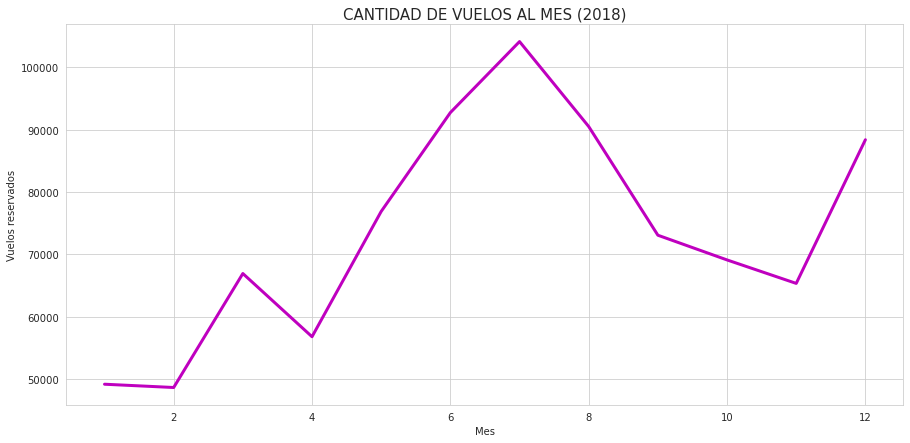

In [223]:
# Filtramos los datos de un año (2018)
datos_2018 = df[df['Year'] == 2018]

# Agrupamos los datos por mes y sumamos los vuelos reservados
vuelos_mes = datos_2018.groupby('Month')['Flights Booked'].sum().reset_index()

# Creamos el gráfico
plt.figure(figsize=(15, 7))
sns.lineplot(data=vuelos_mes, 
             y='Flights Booked', 
             x='Month', color="m", 
             markersize=15, 
             linewidth=3)
plt.title('CANTIDAD DE VUELOS AL MES (2018)', fontsize=15)
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados');


### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

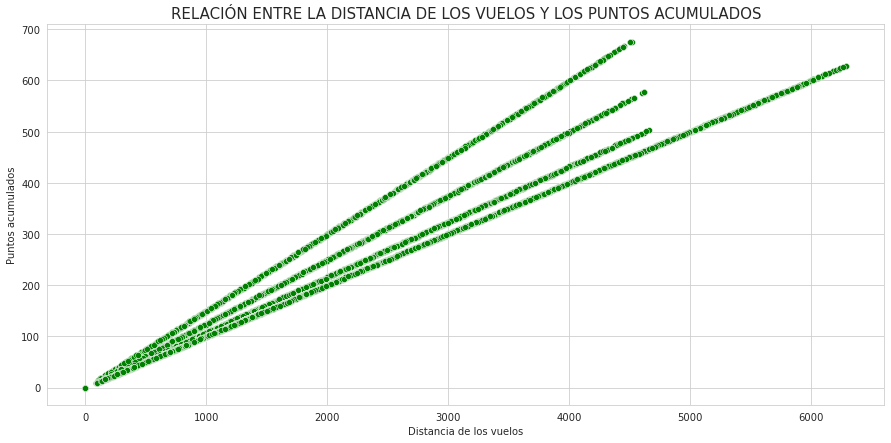

In [224]:
plt.figure(figsize=(15, 7)) 
sns.scatterplot(x = "Distance", 
                y = "Points Accumulated",
                data = df,
                color = 'green')

plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")
plt.title('RELACIÓN ENTRE LA DISTANCIA DE LOS VUELOS Y LOS PUNTOS ACUMULADOS', fontsize = 15);

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

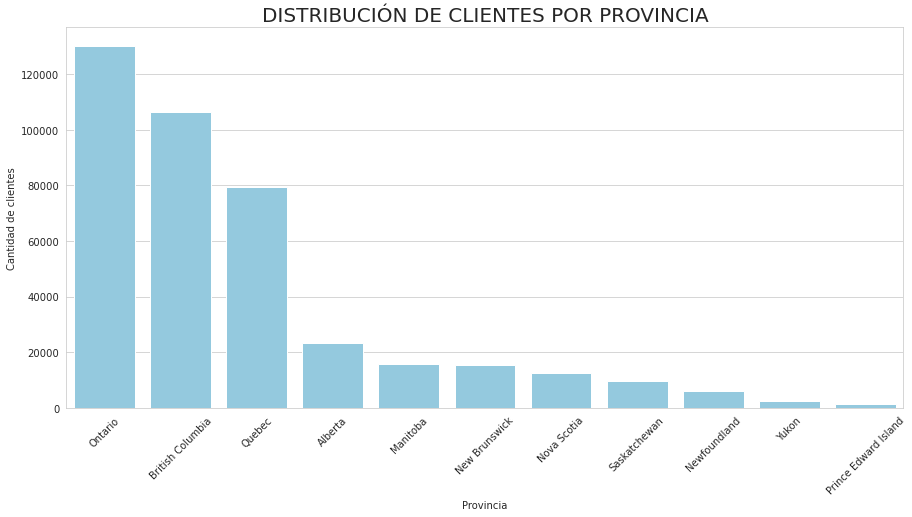

In [90]:
clientes_por_provincia = df['Province'].value_counts().reset_index()
clientes_por_provincia.columns = ['Provincia', 'Cantidad']

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(15, 7))
sns.barplot(x='Provincia', y='Cantidad', data=clientes_por_provincia, color = 'skyblue')
plt.title('DISTRIBUCIÓN DE CLIENTES POR PROVINCIA', fontsize = 20)
plt.xlabel('Provincia')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45);

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [71]:
df_salario= df.groupby("Education")["Salary"].describe()[["mean"]].round(2).reset_index()
df_salario

,Education,mean
0,Bachelor,72667.47
1,College,66914.11
2,Doctor,178403.68
3,High School or Below,61160.76
4,Master,103734.52


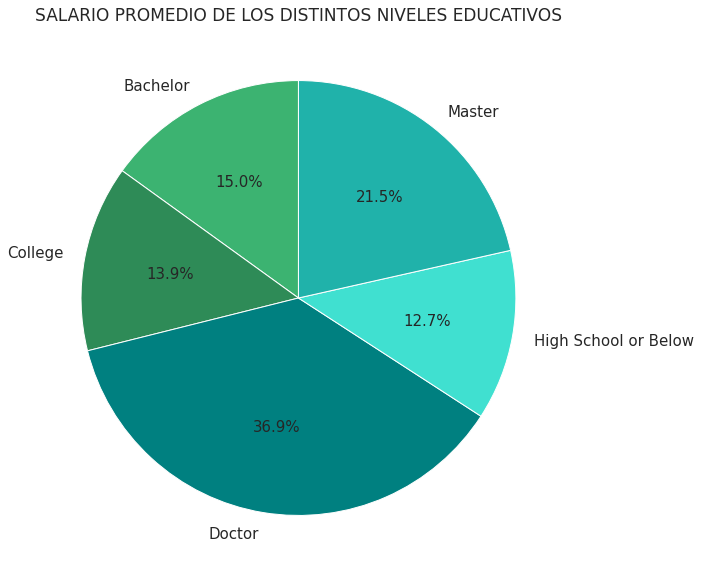

In [230]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
colores = ["mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.title('SALARIO PROMEDIO DE LOS DISTINTOS NIVELES EDUCATIVOS', fontsize = 17)
plt.pie("mean", labels= "Education",
        data = df_salario, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 15}, 
        startangle=90);

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

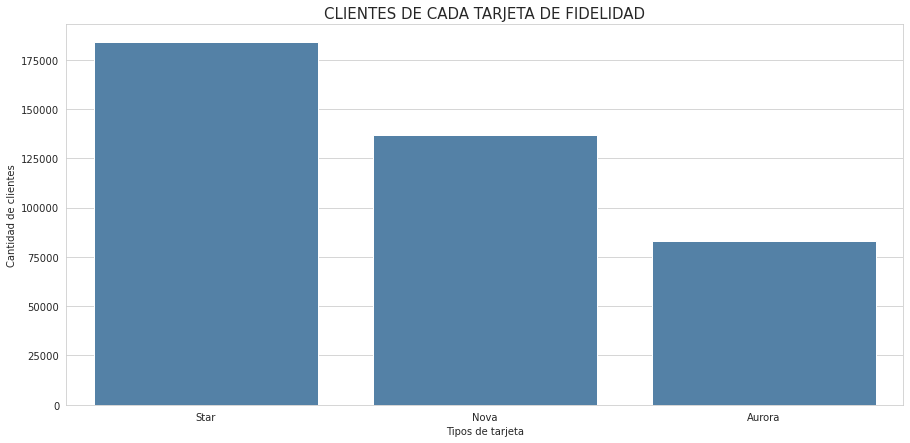

In [226]:
tarjetas = df['Loyalty Card'].value_counts().reset_index()
tarjetas.columns = ['Tarjetas', 'Cantidad']

plt.figure(figsize=(15, 7))
sns.barplot(x='Tarjetas', y='Cantidad', data=tarjetas, color='steelblue')
plt.title('CLIENTES DE CADA TARJETA DE FIDELIDAD', fontsize=15)
plt.xlabel('Tipos de tarjeta')
plt.ylabel('Cantidad de clientes');

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

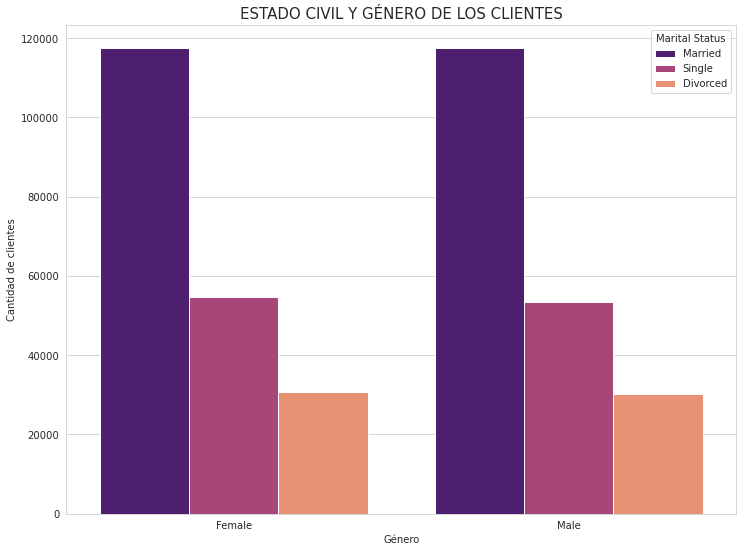

In [225]:
plt.figure(figsize=(12, 9))
sns.countplot(x = "Gender", 
              hue = 'Marital Status',
              data = df,
              palette = 'magma')
plt.title('ESTADO CIVIL Y GÉNERO DE LOS CLIENTES', fontsize=15)
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes');

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

## Preparación de Datos:

In [231]:
# Creamos un nuevo df con las columnas que nos interesan
nuevo_df = df[['Flights Booked', 'Education']]
nuevo_df

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
405619,0,College
405620,0,Doctor
405621,3,Bachelor
405622,0,College


## Análisis Descriptivo:

In [112]:
# Sacamos los principales valores estadísticos
nuevo_df.groupby("Education")["Flights Booked"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.11,5.22,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.17,5.25,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.18,5.26,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.18,5.24,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.20,5.21,0.0,0.0,1.0,8.0,21.0


## Prueba Estadística:

In [149]:
# Creamos una nueva columna con las distintas categorías de educación:

nuevo_df['Education Categories'] = nuevo_df['Education'].apply(lambda x: 'Basic' if x in ['High School or Below', 'College'] else 'Superior')
nuevo_df.sample(10)

,Flights Booked,Education,Education Categories
393497,0,College,Basic
317457,15,Bachelor,Superior
81302,3,Bachelor,Superior
89724,13,Bachelor,Superior
273384,9,Bachelor,Superior
236654,7,Bachelor,Superior
276395,0,Bachelor,Superior
290706,20,High School or Below,Basic
167912,0,Bachelor,Superior
36334,12,Bachelor,Superior


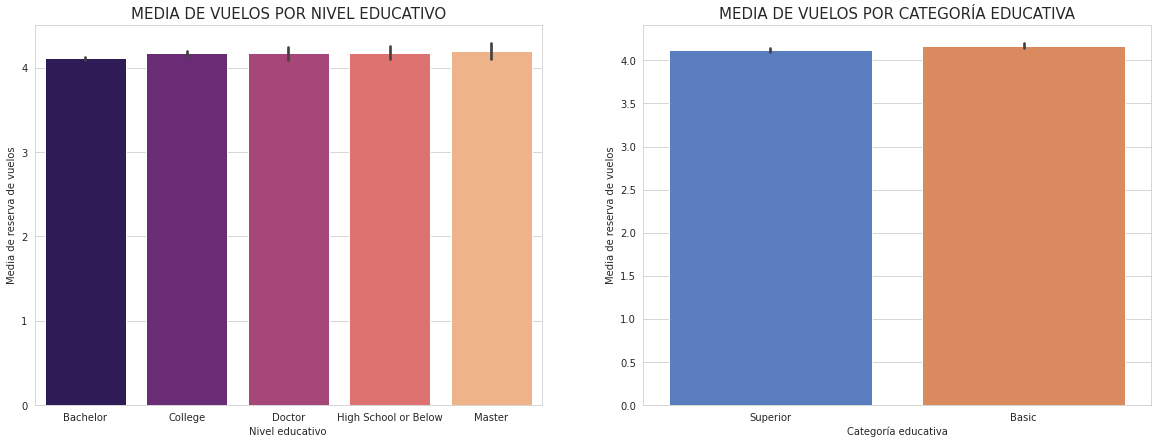

In [210]:
# Visualizamos los datos:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

sns.barplot(x = 'Education', y = 'Flights Booked',
            data = nuevo_df,
            palette = 'magma',
            ax = axes[0])
axes[0].set_title('MEDIA DE VUELOS POR NIVEL EDUCATIVO', fontsize=15)
axes[0].set_xlabel('Nivel educativo')
axes[0].set_ylabel('Media de reserva de vuelos')


sns.barplot(x = 'Education Categories', y = 'Flights Booked',
            data = nuevo_df,
            palette = 'muted',
            ax = axes[1])
axes[1].set_title('MEDIA DE VUELOS POR CATEGORÍA EDUCATIVA', fontsize=15)
axes[1].set_xlabel('Categoría educativa')
axes[1].set_ylabel('Media de reserva de vuelos');



In [141]:
vuelos2= nuevo_df.groupby("Education Categories")["Flights Booked"].describe()[["mean"]].round(2).reset_index()
vuelos2

,Education Categories,mean
0,Basic,4.17
1,Superior,4.12


Planteamos las hipótesis:

- Hipótesis Nula (H0): No hay diferencia de vuelos respecto al nivel educativo

- Definir Hipótesis Alternativa (H1): Sí hay diferencia de vuelos respecto al nivel educativo

In [120]:
# Evaluamos la distribución normal de los datos:
p_value = kstest(nuevo_df['Flights Booked'], "norm").pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 0.0 )


In [130]:
def prueba_hipotesis(*args):
    
    # miramos si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
    
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa entre los dos grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa en los dos grupos.")

In [161]:
# filtramos los datos para obtener dos grupos: Basic y Superior
grupo_educacion_basica = nuevo_df[nuevo_df['Education Categories'] == 'Basic']["Flights Booked"]
grupo_educacion_superior= nuevo_df[nuevo_df['Education Categories'] == 'Superior']["Flights Booked"]

# llamamos a la función que hemos creado
prueba_hipotesis(grupo_educacion_basica, grupo_educacion_superior )

Rechazamos la hipótesis nula.
Hay una diferencia significativa entre los dos grupos.


Dada la discordancia entre los gráficos y los resultados de las pruebas, comprobamos la reserva de vuelos por categoría sumando las cantidades de vuelos reservados (no sus medias):

In [218]:
reserva_vuelos= nuevo_df.groupby("Education")["Flights Booked"].sum().reset_index()
reserva_vuelos

,Education,Flights Booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


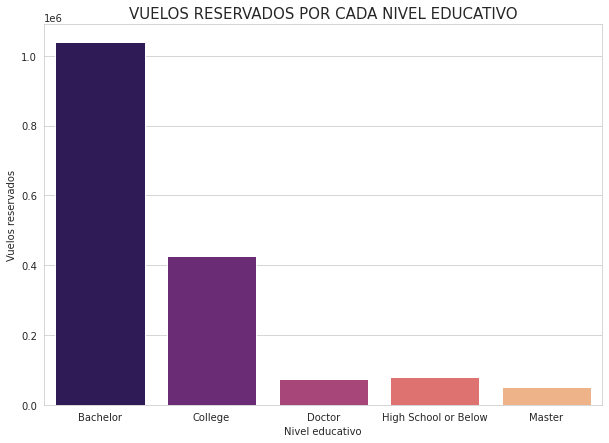

In [232]:
plt.figure(figsize=(10, 7))
sns.barplot(x = 'Education', y = 'Flights Booked',
            data = reserva_vuelos,
            palette = 'magma')
plt.title('VUELOS RESERVADOS POR CADA NIVEL EDUCATIVO', fontsize=15)
plt.xlabel('Nivel educativo')
plt.ylabel('Vuelos reservados');

Comprobamos la cantidad de viajeros por cada nivel educativo y entendemos por qué la media sí es similar a pesar de que la reserva de billetes es distinta:

In [220]:
personas_vuelan= nuevo_df.groupby("Education")["Flights Booked"].count().reset_index()
personas_vuelan

,Education,Flights Booked
0,Bachelor,252567
1,College,102260
2,Doctor,17731
3,High School or Below,18915
4,Master,12287


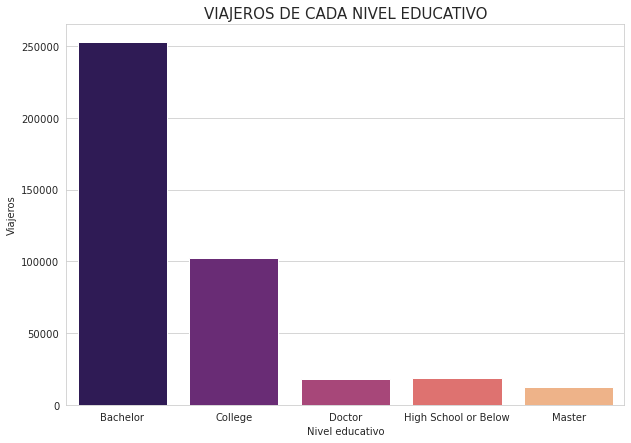

In [233]:
plt.figure(figsize=(10, 7))
sns.barplot(x = 'Education', y = 'Flights Booked',
            data = personas_vuelan,
            palette = 'magma')
plt.title('VIAJEROS DE CADA NIVEL EDUCATIVO', fontsize=15)
plt.xlabel('Nivel educativo')
plt.ylabel('Viajeros');

Ahora hacemos esto mismo con las categorías educativas que hemos utilizado en las pruebas:

In [170]:
reserva_vuelos2= nuevo_df.groupby("Education Categories")["Flights Booked"].sum().reset_index()
personas_vuelan2= nuevo_df.groupby("Education Categories")["Flights Booked"].count().reset_index()
df_resultados = pd.merge(reserva_vuelos2, personas_vuelan2, on='Education Categories')
df_resultados.columns = ['Categorías educativas','Reserva de vuelos','Personas que vuelan']

df_resultados


,Categorías educativas,Reserva de vuelos,Personas que vuelan
0,Basic,505391,121175
1,Superior,1163773,282585


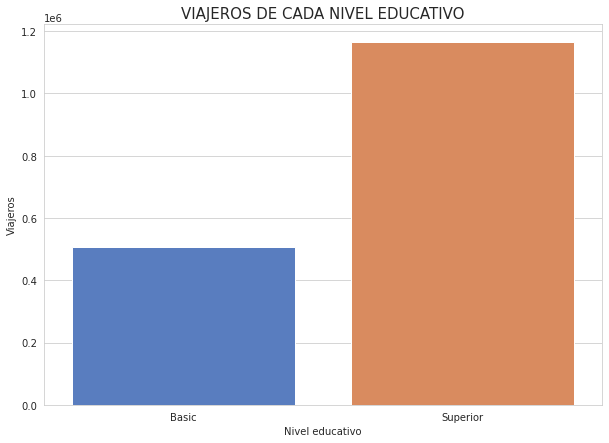

In [235]:
plt.figure(figsize=(10, 7))
sns.barplot(x = 'Categorías educativas', 
            y = 'Reserva de vuelos',
            data = df_resultados,
            palette = 'muted')
plt.title('VIAJEROS DE CADA NIVEL EDUCATIVO', fontsize=15)
plt.xlabel('Nivel educativo')
plt.ylabel('Viajeros');

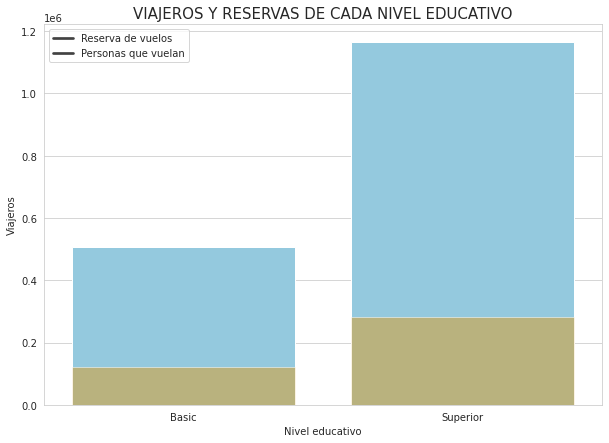

In [234]:
# Crear el gráfico con dos barras
plt.figure(figsize=(10, 7))

# Barras para la reserva de vuelos
sns.barplot(x='Categorías educativas', y='Reserva de vuelos', data=df_resultados, color='skyblue')

# Barras adicionales para personas que vuelan con transparencia (alpha)
sns.barplot(x='Categorías educativas', y='Personas que vuelan', data=df_resultados, color='orange', alpha=0.5)

plt.title('VIAJEROS Y RESERVAS DE CADA NIVEL EDUCATIVO', fontsize=15)
plt.xlabel('Nivel educativo')
plt.ylabel('Viajeros')
plt.legend(['Reserva de vuelos', 'Personas que vuelan'])
plt.show()


In [189]:
df_resultados

,Categorías educativas,Reserva de vuelos,Personas que vuelan
0,Basic,505391,121175
1,Superior,1163773,282585


In [197]:
#calculamos los porcentajes de reservas de vuelos de cada categoría de estudios:

porcentaje_basic = round((df_resultados['Reserva de vuelos'][0]*100)/df_resultados['Reserva de vuelos'].sum(),2)
porcentaje_superior = round((df_resultados['Reserva de vuelos'][1]*100)/df_resultados['Reserva de vuelos'].sum(),2)
print(f'El porcentaje de vuelos reservados por los pasajeros con categoría básica de estudios es de {porcentaje_basic} %')
print(f'El porcentaje de vuelos reservados por los pasajeros con categoría superior de estudios es de {porcentaje_superior} %')

El porcentaje de vuelos reservados por los pasajeros con categoría básica de estudios es de 30.28 %
El porcentaje de vuelos reservados por los pasajeros con categoría superior de estudios es de 69.72 %


### Conclusiones

Las conclusiones que se extraen es que, a pesar de que la media de reservas de vuelos por nivel educativo es muy similar, las personas con un nivel de estudios superior (titulaciones universitarias, masters y doctorados) reservan un 39,44% más vuelos que las personas con un nivel de estudios básico.